<a href="https://colab.research.google.com/github/AlexandraMihalevschi/Data_Science/blob/main/Fortune_1000.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Influența factorilor interni și externi asupra clasamentului, succesului și profitului companiilor din SUA

> Următorul articol se va adresa tuturor viitorilor bărbați și femei de afaceri. Anii 2020-2021 au fost într-adevăr grei pentru industrie. Pandemia a afectat nu numai sănătatea oamenilor, ci și "sănătatea" companiilor. Indiferent de aceasta, ca viitori oameni de treabă, avem nevoie și noi de cele mai actuale informații de pe piață. Astfel, pentru a crea propria companie, avem nevoie să aflăm ce bariere și ce factori vor influența viitoarea noastră companie. Haideți să analizăm!






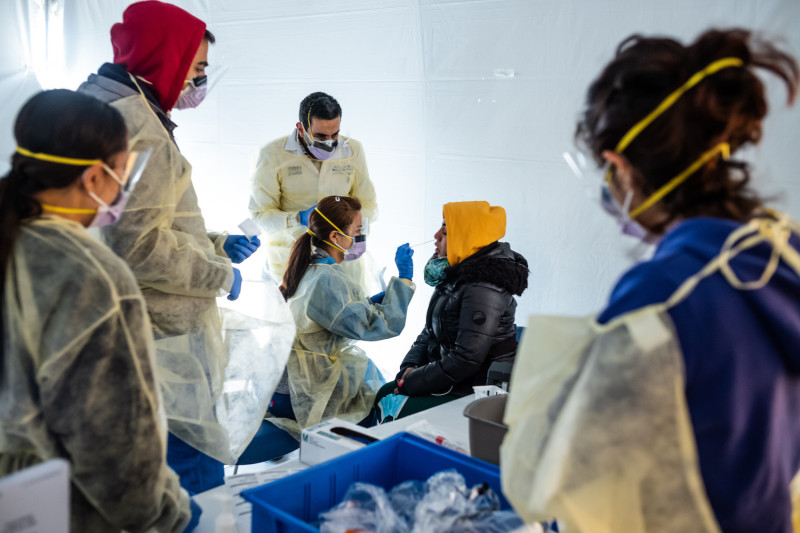



---





In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import urllib.request, csv
path = "https://girlsgoitpublic.z6.web.core.windows.net/Fortune_1000.csv"
response = urllib.request.urlopen(path)
lines = [l.decode('utf-8')for l in response.readlines()]
content = csv.reader(lines)
company = list(content)

TypeError: ignored

Comform datelor oferite de revista Fortune, acestea sunt 1000 de companii din SUA care au activat în decursul acestui an

In [ ]:
for i in company:
    print(i)



---



# Depinde succesul de genul directorului general?

În această secțiune a analizei, va fi cercetat succesul companiilor de top din SUA în funcție de repartiția pe genuri a directorilor generali ce le administrează. Este această repartiție una uniformă și simetrică? Identificăm diferențe comparabile de venit si profit între companiile  administrate  de femei si cele administrate de bărbați? În final, constituie genul directorului general un factor decisiv in succesul unei companii? 

In [ ]:
# Creăm o funcție care să acceseze, să extragă și să includă într-o listă datele pe care vrem să le analizăm, accesându-le după index.

list=[]
def companies_attributes(attribute_index):
  for row in company[1:]:
      list.append(row[attribute_index])
  return list

In [ ]:
# Creăm o listă care conține datele coloanei ceo_woman
list_ceo_gender = companies_attributes(11)

In [ ]:
# Determinăm numărul de directori generali de gen masculin și de gen feminin
nr_of_fem_ceo=sum(value == 'yes' for value in list_ceo_gender)
nr_of_male_ceo=sum(value == "no" for value in list_ceo_gender)
total_ceos=[nr_of_fem_ceo,nr_of_male_ceo]

Text(0.5, 1.0, "CEOs' Gender Distribution")

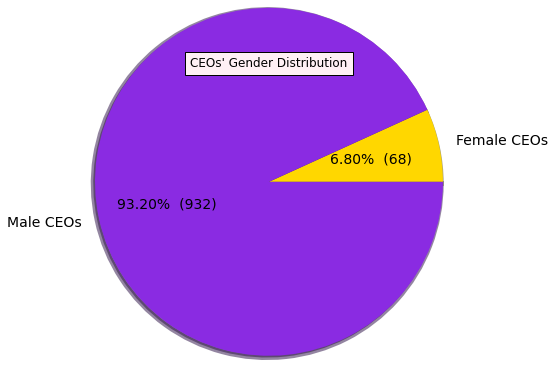

In [ ]:
#Creăm un pie chart care să ne afișeze repartiția procentuală pe genuri, cât și numărul de directori de fiecare gen
def make_autopct(list_of_nr_ceos):
    def my_autopct(pct):
        total = sum(list_of_nr_ceos)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.pie(total_ceos, labels=["Female CEOs", "Male CEOs"], colors=["#FFD700","#8a2be2"],autopct=make_autopct(total_ceos), textprops={'size':14},radius=2, shadow=True,wedgeprops = {'linewidth': 5})
plt.title("CEOs' Gender Distribution", bbox={'facecolor':'#FFF0F5', 'pad':5})

Observăm o repartiție pe genuri neuniformă, pozițiile de director fiind preponderent ocupate de bărbați.  

Observăm o repartiție pe genuri neuniformă, pozițiile de director fiind preponderent ocupate de bărbați.  

In [ ]:
#Calculăm media veniturilor și profiturilor în funcție de genul directorului pentru a depista similarități și diferențe
list_ceo_revenue_male=[]
list_ceo_revenue_female=[]
list_ceo_profit_male=[]
list_ceo_profit_female=[]

for row in company[1:]:
  if row[11] == "no":
    list_ceo_revenue_male.append(float(row[3]))
    list_ceo_profit_male.append(row[4].replace('\U00002013', '-'))
  else:
    list_ceo_revenue_female.append(float(row[3]))
    list_ceo_profit_female.append(float(row[4].replace('\U00002013', '-')))

list_ceo_profit_male  #conține date lipsă
#identific indexul si apoi valoarea corespunzătoare acestuia care nu poate fi convertit în float
for index, profit_value in enumerate(list_ceo_profit_male):
      try:
        list_ceo_profit_male[index]=float(profit_value)
      except:
        print("not convertible to float "+ str(index)+ str(profit_value)) 
list_ceo_profit_male[622] ## am identificat valoarea ce nu poate fi convertită  

not convertible to float 622
not convertible to float 669


''

In [ ]:
#Eliminam datele lipsă
for item in list_ceo_profit_male: #Eliminam datele lipsa
  if item=='':
    list_ceo_profit_male.remove('')

In [ ]:
#Calculăm media veniturilor și profiturilor
def Average(lst):
    return sum(lst) / len(lst)

male_avg= Average(list_ceo_revenue_male)
female_avg = Average(list_ceo_revenue_female)
female_profit_avg=Average(list_ceo_profit_female)
male_profit_avg=Average(list_ceo_profit_male)

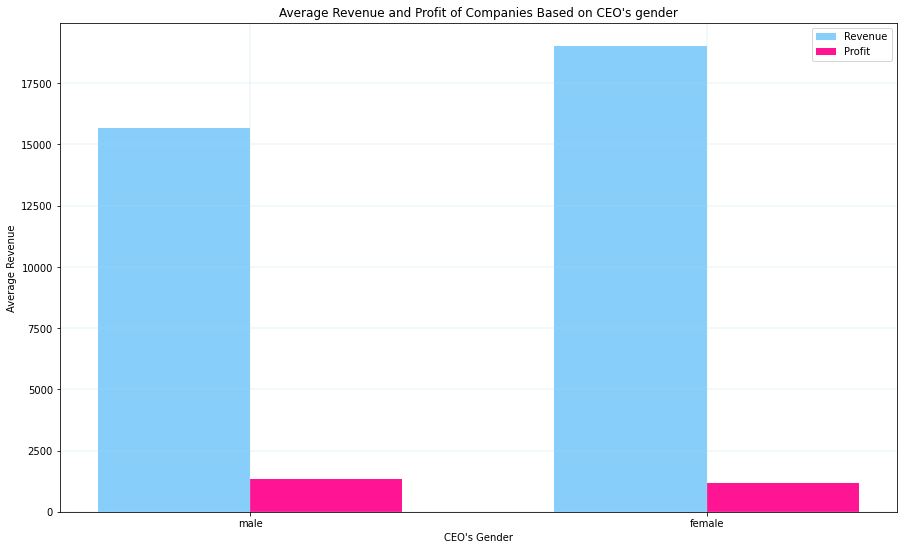

In [ ]:
#Creăm bar chart care să afișeze valorile medii ale veniturilor și profiturilor în funcție de gen
width=0.5
ind=np.arange(1,3)
new_ind = ind*1.5 #scalam axa x pentru a distanta barele
plt.figure(figsize=(15,9))
plt.bar(new_ind,[male_avg, female_avg], color="#87CEFA",width=width,align='center',label='Revenue')
plt.bar(new_ind+width,[male_profit_avg,female_profit_avg], color="deeppink", width=width,align='center',label='Profit')
plt.xticks(new_ind+width/2,labels=['male','female'])
plt.ylabel("Average Revenue")
plt.xlabel('CEO\'s Gender')
plt.title("Average Revenue and Profit of Companies Based on CEO's gender")
plt.legend()
plt.grid(color='#add8e6', linestyle='-', linewidth=0.3)

Deși companiile conduse de bărbați le depășesc numeric pe cele conduse de femei, observăm că diferențele de profit sunt aproape neidentificabile. Mai mult decât atât, venitul mediu al companiilor conduse de femei depășește ușor venitul mediu al companiilor conduse de bărbați.

Să observăm mai îndeaproape variabilitatea și dispersia veniturilor în ambele categorii.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


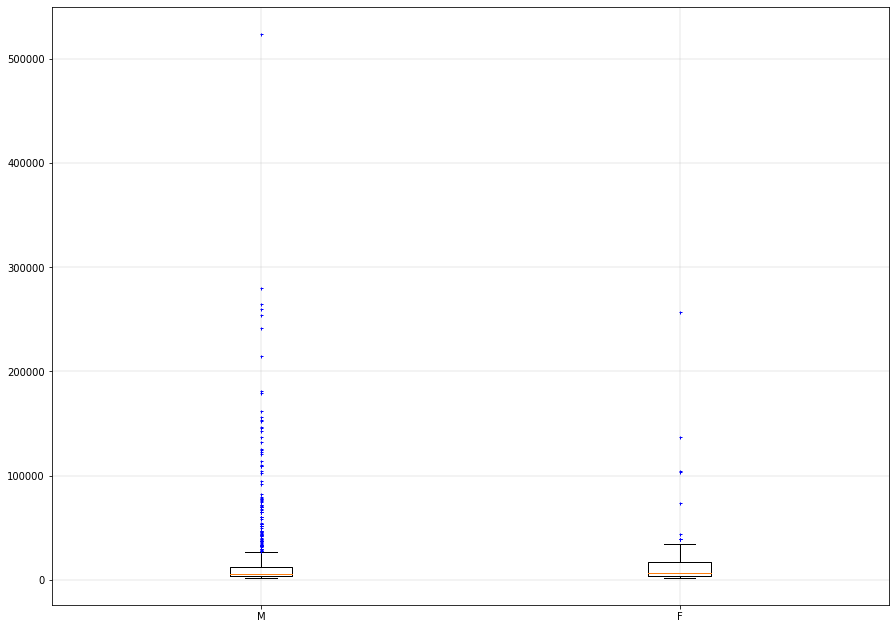

In [ ]:
#Creăm un boxplot pentru a cerceta distribuția datelor cu privire la venit
plt.figure(figsize=(15,11))

plt.boxplot([list_ceo_revenue_male,list_ceo_revenue_female], labels=["M", "F"],sym='b+', flierprops={'markersize':3, "markeredgecolor":'#8a2be2', 'markerfacecolor':'#87CEFA'})
plt.grid(linestyle='-', linewidth=0.3)

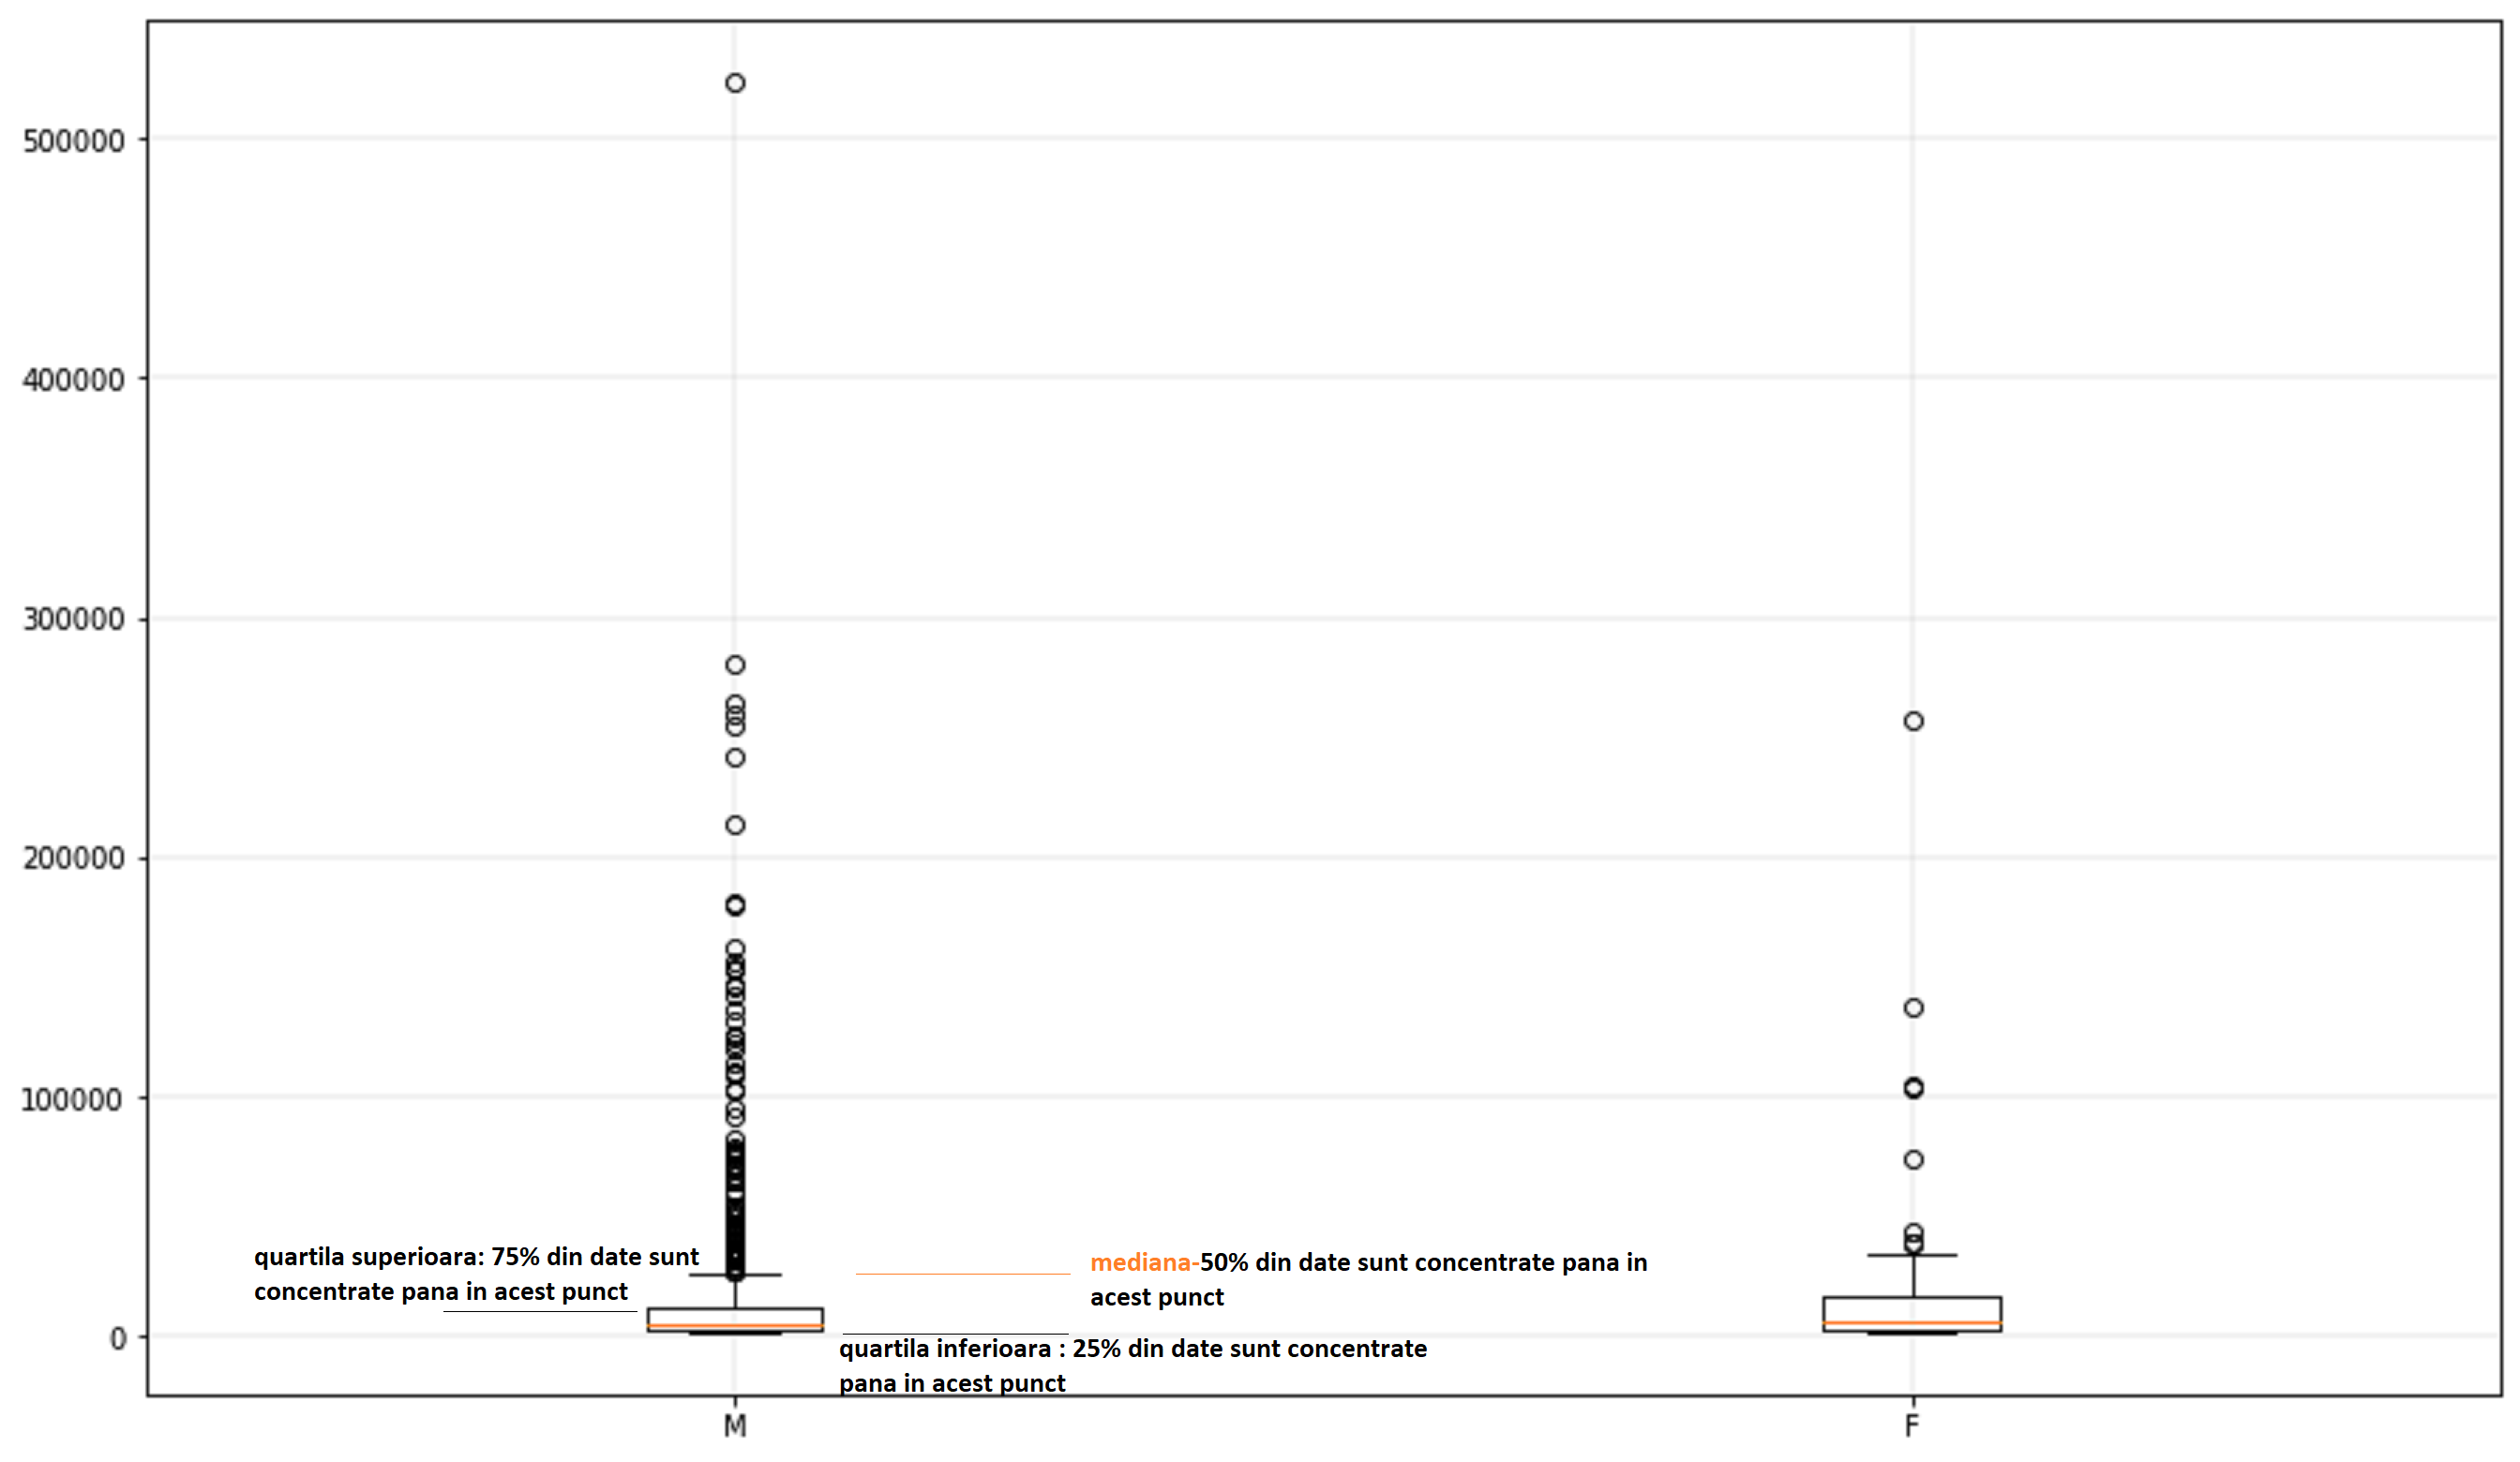
Boxplot-ul ne ajuă să identificăm frecvența datelor și intervalul unde acestea se concentrează cel mai mult, asemenea unei histrograme, totuși prezintă si un mic rezumat al datelor noastre - mediana, maxim, minim și quartilele(valorile care împart setul de date în sferturi). Cutiile arată cât de dispersate sunt valorile veniturilor. În ambele cazuri, cutiile sunt scurte și compacte, fapt care indică că mare parte a veniturilor sunt concentrate în jurul aceleași valori și că sunt dispersate pe un interval mic.

Quartilele ne arată câte procente de date sunt concentrate până în acel punct. Cea superioară, de exemplu, ne arată că 75% din datele despre venitul companiilor sunt dispersate pe un interval ce nu depășeste 25 000 în venit.

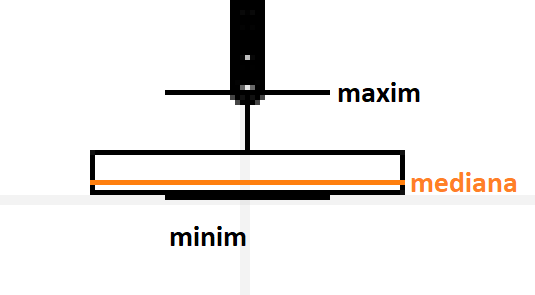

Mediana împarte cutia în 2 secțiuni.
Cea de jos este mai mică, mai compactă, fapt care indică că majoritatea veniturilor din această porțiune variază puțin și nu depășesc valoarea medianei. 

Comparând ambele cutii, observăm că mediana veniturilor este aproximativ aceeași. Cutiile sunt compacte în ambele cazuri, indicând venituri puțin dispersate, cu valori sub 25 000 în majoritatea companiilor.
Deși numărul companiilor conduse de bărbați este mai mare, în ambele categorii majoritatea veniturilor sunt dispersate pe același interval de valori.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


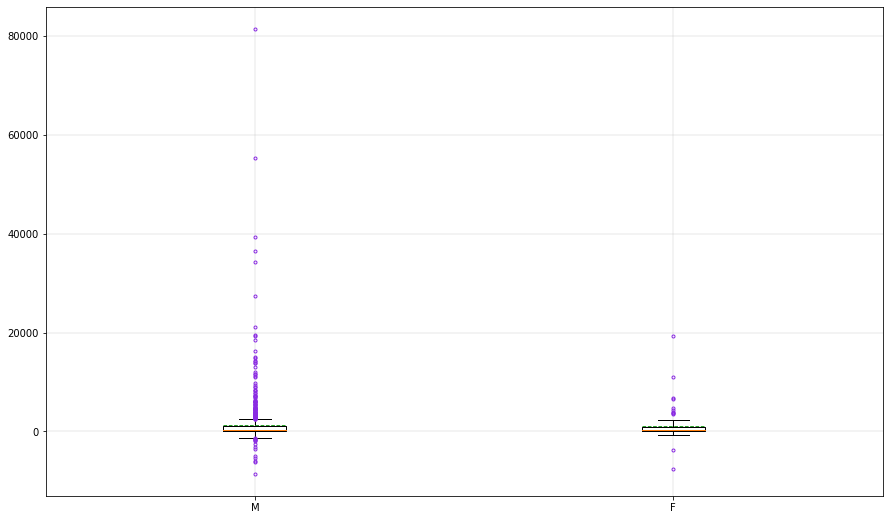

In [ ]:
#Boxplot al profiturilor
plt.figure(figsize=(15,9))
plt.boxplot([list_ceo_profit_male,list_ceo_profit_female], labels=["M", "F"], meanline=True, showmeans=True, flierprops={'markersize':3, "markeredgecolor":'#8a2be2'})
plt.grid(linestyle='-', linewidth=0.3)

Observăm similaritatea în dispersia valorilor și atunci când comparăm distribuția profiturilor în funcție de genul directorului general.

Concluzionăm că, deși repartiția pe genuri este una neuniformă, nu se evidențiază diferențe majore în privința venitului și profitului, fapt care confirmă capabilitatea ambelor genuri de-a administra eficient o companie și de a-i asigura succesul.

În caz dacă nu se afișează graficele sau dă eroare, puteți să accesați următorul [link](https://colab.research.google.com/drive/17t_IkZ7oGlizavPLu95lsr6txMAeqUWp?usp=sharing).

# Depinde succesul pe localizare?

In [ ]:
import matplotlib.pyplot as plt
import urllib.request, csv
path = "https://girlsgoitpublic.z6.web.core.windows.net/Fortune_1000.csv"
response = urllib.request.urlopen(path)
lines = [l.decode('utf-8')for l in response.readlines()]
content = csv.reader(lines)
companies = list(content)

TypeError: ignored

In [ ]:
from collections import defaultdict

def regiuni_metric(metric_index):
    d = defaultdict(list)

    for company in companies[1:]:
      city = company[7]
      
      try:
          profit = float(company[metric_index])
      except:
        print(company)

      d[city].append(profit)
    return d

In [ ]:
regiuni_profit = regiuni_metric(4)

TypeError: ignored

In [ ]:
regiuni_profit

NameError: ignored

In [ ]:
dict_regiuni = {}
for key, value in regiuni_profit.items():
    mean = sum(value)/len(value)

    dict_regiuni[key] = mean

NameError: ignored

In [ ]:
  from collections import OrderedDict
  from operator import itemgetter
  sorted_dict_regiuni = OrderedDict(sorted(dict_regiuni.items(), key=itemgetter(1), reverse= True))
#   sorted_dict_regiuni

In [ ]:
sorted_dict_regiuni.keys()

In [ ]:
sorted_dict_regiuni.values()

Care este profitul anual al fiecărui oraș?

In [ ]:
plt.figure(figsize = (15, 70))
plt.barh(list(sorted_dict_regiuni.keys()), list(sorted_dict_regiuni.values()), color = '#8a2be2')

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
ax1.barh(list(sorted_dict_regiuni.keys())[-6:], list(sorted_dict_regiuni.values())[-6:], color = '#FFD700')
ax2.barh(list(sorted_dict_regiuni.keys())[:6], list(sorted_dict_regiuni.values())[:6], color = '#87CEFA')

In [ ]:
def industries_employees(metric_index):
    d = defaultdict(list)

    for company in companies[1:]:
      industry = company[6]
      
      try:
          employees = float(company[metric_index])
      except:
        print(company)

      d[industry].append(employees)
    return d

In [ ]:
industry_employees_dict = industries_employees(5)

In [ ]:
dict_industry_employees={}
for key, value in industry_employees_dict.items():
  mean = sum(value)/len(value)

  dict_industry_employees[key] = mean

In [ ]:
from collections import OrderedDict
from operator import itemgetter
sorted_dict_industry_employees = OrderedDict(sorted(dict_industry_employees.items(), key=itemgetter(1), reverse= True))

In [ ]:
sorted_dict_industry_employees.keys()

In [ ]:
sorted_dict_industry_employees.values()

Cât de mult influențează numărul angajaților în fiecare sector?

In [ ]:
plt.figure(figsize = (30, 10))
plt.bar(list(sorted_dict_industry_employees.keys()), list(sorted_dict_industry_employees.values()), color = '#8a2be2')
plt.xticks(rotation = 90, fontsize=18)
plt.yticks(fontsize=18)



---



În caz dacă nu se afișează graficele sau dă eroare, puteți să accesați următorul [link](https://colab.research.google.com/drive/1STsLLxqS4_Q6Mcirq2qqVhaDvVGbP1eF?usp=sharing).

# Depinde succesul de sector? 



Există multe obstacole în crearea companiei. Una dintre acestea este sectorul. Fie, dar ce importanță are sectorul în succesul companiei? Și are oare? Haideți să analizăm 5 cele mai populare sau evidențiate sectoare în timpul pandemiei.

In [ ]:
def company_metric(company_sector, metric_index):
    dictionary = {}
    for sublist in company[1:]:
        if sublist[6] == company_sector:
            dictionary[str(sublist[0])] = float(sublist[metric_index])
    
    return dictionary

In [ ]:
print(company[0])

In [ ]:
financials_income = company_metric('Financials', 4)
retailing_income = company_metric('Retailing', 4)
technology_income = company_metric('Technology', 4)
restaurants_income = company_metric('Hotels, Restaurants & Leisure', 4)
health_care_income = company_metric('Health Care', 4)

In [ ]:
print(financials_income)
print(retailing_income)
print(technology_income)
print(restaurants_income)
print(health_care_income)

Finanse, Retailing, Tehnologii, Restaurante și Recreație, Sănătate. Există oare vreo diferență de venit la aceste sectoare? Și oare merită să te dedici acestor domenii sau nu?

In [ ]:
companies_financials = list(financials_income.keys()) 
companies_financials_income =list(financials_income.values())

companies_retailing = list(retailing_income.keys()) 
companies_retailing_income =list(retailing_income.values())

companies_technology = list(technology_income.keys()) 
companies_technology_income =list(technology_income.values())

companies_restaurants = list(restaurants_income.keys()) 
companies_restaurants_income =list(restaurants_income.values())

companies_health_care = list(health_care_income.keys()) 
companies_health_care_income =list(health_care_income.values())

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize = (21,15), sharey=True)

labels1 = ['Finances']
labels2 = ['Retailing']
labels3 = ['Technology']
labels4 = ['Hotels, Restaurans & Leisure']
labels5 = ['Health Care']
flierprops = dict(marker='_', markerfacecolor='#87CEFA', markersize = 50,
                  linestyle=':', markeredgecolor='#8a2be2')
medianprops = {'color': 'purple', 'linewidth': 2}

#plt.figure(figsize=(15,30))
ax1.boxplot(companies_financials_income, labels= labels1, flierprops= flierprops, medianprops= medianprops, notch=True)
ax2.boxplot(companies_retailing_income, labels= labels2, flierprops= flierprops, medianprops= medianprops, notch=True)
ax3.boxplot(companies_technology_income, labels= labels3, flierprops= flierprops, medianprops= medianprops, notch=True)
ax4.boxplot(companies_restaurants_income, labels= labels4, flierprops= flierprops, medianprops= medianprops, notch=True)
ax5.boxplot(companies_health_care_income, labels= labels5, flierprops= flierprops, medianprops= medianprops, notch=True)

#plt.ylabel('Income')
#plt.title('Income per companies in finances');
plt.grid(True)
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

plt.show()

TypeError: ignored

Deci, observăm că cei mai mulți bani primesc companiile din domeniul finanselor și al tehnologiei. Sau nu? Haideți să analizăm aceleași domenii din altă perspectivă, adică cea a profitului.  

In [ ]:
def company_profit(company_sector, profit):
    dictionary_profit = {}
    for row in company[1:]:
        if row[6] == company_sector:
            dictionary_profit[str(row[0])] = float(row[profit])  
    
    return dictionary_profit

In [ ]:
financials_profit = company_profit('Financials', 4)
retailing_profit = company_profit('Retailing', 4)
technology_profit = company_profit('Technology', 4)
restaurants_profit = company_profit('Hotels, Restaurants & Leisure', 4)
health_care_profit = company_profit('Health Care', 4)

In [ ]:
sorted_financials = dict(sorted(financials_profit.items(), key=lambda pair: pair[1]))
financials_company_lst = list(sorted_financials.keys())[:30]
financials_profit_lst =list(sorted_financials.values())[:30]

plt.figure(figsize=(10,7))
plt.barh(financials_company_lst, financials_profit_lst, color = 'deeppink', alpha = 0.5)
plt.xlabel('Income')
plt.ylabel('Companies')
plt.title('The financial companies profit distribution')
plt.grid(True)

Observăm că cei din domeniul finanselor au un profit destul de ok. Chiar dacă au pierdut multe. Dar ce pot spune alte domenii?

In [ ]:
sorted_retailing = dict(sorted(retailing_profit.items(), key=lambda pair: pair[1]))
retailing_company_lst = list(sorted_retailing.keys())[:30]
retailing_profit_lst =list(sorted_retailing.values())[:30]

sorted_technology = dict(sorted(technology_profit.items(), key=lambda pair: pair[1]))
technology_company_lst = list(sorted_technology.keys())[:30]
technology_profit_lst =list(sorted_technology.values())[:30]

sorted_restaurants = dict(sorted(restaurants_profit.items(), key=lambda pair: pair[1]))
restaurants_company_lst = list(sorted_restaurants.keys())[:30]
restaurants_profit_lst =list(sorted_restaurants.values())[:30]

sorted_health_care = dict(sorted(health_care_profit.items(), key=lambda pair: pair[1]))
health_care_company_lst = list(sorted_health_care.keys())[:30]
health_care_profit_lst =list(sorted_health_care.values())[:30]



fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (40, 40), sharex= True)
ax1.barh(retailing_company_lst, retailing_profit_lst, alpha = 0.5, color = '#8a2be2')
ax2.barh(technology_company_lst, technology_profit_lst, alpha = 0.5, color = '#8a2be2')
ax3.barh(restaurants_company_lst, restaurants_profit_lst, alpha = 0.5, color = '#8a2be2')
ax4.barh(health_care_company_lst, health_care_profit_lst, alpha = 0.5, color = '#8a2be2')
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)
ax4.grid(True)

ax1.set_title('The retailing companies profit distribution')
ax1.set_xlabel("Income")
ax1.set_ylabel("Company")

ax2.set_title('The technology companies profit distribution')
ax2.set_xlabel("Income")
ax2.set_ylabel("Company")

ax3.set_title('The restaurants companies profit distribution')
ax3.set_xlabel("Income")
ax3.set_ylabel("Company")

ax4.set_title('The health care companies profit distribution')
ax4.set_xlabel("Income")
ax4.set_ylabel("Company")

Observăm că mult au primit cei din domeniul recreației, iar restul au avut de suferit urmările pandemiei. 

Concluzie? În primul rând, succesul poate depinde de sector, iar în al doilea rând, venitul și profitul sunt două valori complet diferite și ele pot schimba destul de radical mersul "jocului".

În caz dacă nu se afișează graficele sau dă eroare, puteți să accesați următorul [link](https://colab.research.google.com/drive/1dMzWtZmCeoyMDjzQ33lr2NJ35endif-a?usp=sharing).



---



Astfel, noi am văzut că succesul poate depinde de mulți factori, atât interni, cât și externi. Nu e numaidecât să ai zeci de mii de angajați, pentru a avea mulți bani sau un venit mare, pentru a avea un profit satisfăcător. De aceea, toată informația analizată poate să influențeze mult asupra viitorilor oameni de afaceri, dar să nu uităm că multe depind și de situație. Așa că utilizând logica proprie și graficele de mai sus în calitate de scut, putem să atingem înălțimi mari.
Mulțumim pentru atenția acordată și succese în crearea propriei companii!